### Predictive Maintenance (Anomaly detection/ Binary classification)
- Objective: product quality (pass/fail)
- Key Issues: High Dimensionality (# of parameter > # of data point) & Imbalanced
- Evaluation metrics: F1-score

### Tips
- Feature selection or Dimension Reduction approach should be done
- Can view the problem as time series or not time series data to process

In [1]:
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')
os.getcwd()

'G:\\我的雲端硬碟\\人工智慧\\HW3\\HW3_workspace'

In [22]:
df = pd.read_csv(r'G:/我的雲端硬碟/人工智慧/HW3/dataset/hw3_train.csv')
print(df.shape)
df.head()

(1097, 593)


,Id,Time,0,1,2,3,4,5,6,7,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,1.0,7/19/2008 11:55,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,0.0
1,2.0,7/19/2008 12:32,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,0.0
2,3.0,7/19/2008 13:17,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1.0
3,4.0,7/19/2008 14:43,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,0.0
4,5.0,7/19/2008 15:22,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,0.0


In [23]:
df = df.fillna(df.mean())

In [24]:
df.describe()

,Id,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.0,1097.000000,1097.000000,1097.000000,...,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000
mean,548.500000,3011.834872,2494.378918,2198.948406,1369.930031,1.293688,100.0,101.457260,0.122371,1.474345,...,92.160205,0.500045,0.015547,0.003911,3.116078,0.021085,0.016266,0.005215,98.598939,0.071168
std,316.387816,65.765984,83.959375,30.547824,369.843475,0.378982,0.0,4.505687,0.001933,0.068038,...,46.634326,0.003565,0.020312,0.004409,4.234073,0.011147,0.008043,0.002542,89.167484,0.257105
min,1.000000,2743.240000,2158.750000,2060.660000,847.797600,0.681500,100.0,83.423300,0.116000,1.191000,...,0.000000,0.477800,0.006500,0.001700,1.284500,-0.004200,0.004200,0.001500,0.000000,0.000000
25%,275.000000,2967.400000,2450.050000,2180.377800,1070.043900,1.017700,100.0,99.217800,0.121100,1.428100,...,92.160205,0.497700,0.011500,0.003100,2.298700,0.013100,0.010700,0.003400,44.368600,0.000000
50%,548.500000,3010.300000,2497.030000,2199.333400,1288.085700,1.308400,100.0,101.864400,0.122200,1.471200,...,92.160205,0.500100,0.013700,0.003600,2.744400,0.020200,0.014900,0.004600,73.150200,0.000000
75%,822.000000,3055.660000,2538.430000,2218.055500,1593.122000,1.486900,100.0,104.415600,0.123800,1.525000,...,92.160205,0.502400,0.016400,0.004100,3.284400,0.027700,0.020300,0.006400,114.412700,0.000000
max,1096.000000,3266.040000,2846.440000,2315.266700,3715.041700,3.889400,100.0,111.890000,0.128600,1.656400,...,706.824000,0.509800,0.476600,0.104500,99.303200,0.058400,0.060700,0.018800,706.824000,1.000000


### Also have imbalance data issue
- tips: sampling, reweighting, distribution based approach (binary classification)
- view the problem as an anomaly detection problem
- [Imbalanced data API reference](https://imbalanced-learn.org/stable/references/index.html#api)

Imbalanced Ratio: 13.051
Minority: 78
Majority: 1018


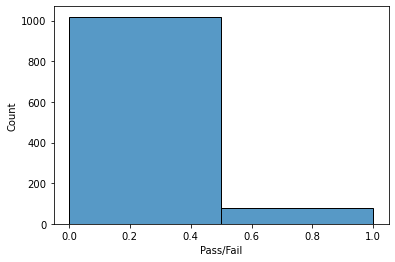

In [25]:
# Imbalanced Data
import seaborn as sns
sns.histplot(df['Pass/Fail'], bins=2)

#Check the imbalanced ratio
print('Imbalanced Ratio:', round((len(df[df['Pass/Fail'] == 0]) / len(df[df['Pass/Fail'] == 1])),3))
print('Minority:',len(df[df['Pass/Fail'] == 1]))
print('Majority:',len(df[df['Pass/Fail'] == 0]))

### Use all features

In [26]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
le = LabelEncoder()
df['Time'] = le.fit_transform(df['Time'])
df['Pass/Fail'] = le.fit_transform(df['Pass/Fail'])

X = df[df.columns[0:-1]]
X = MinMaxScaler().fit_transform(X)
y = df[df.columns[-1]]

In [28]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score as AUC
model = XGBClassifier()
model.fit(X,y)

df_test = pd.read_csv(r'G:/我的雲端硬碟/人工智慧/HW3/dataset/hw3_test.csv')
df_test = df_test.fillna(df_test.mean())
df_test['Time'] = le.fit_transform(df_test['Time'])

X_test = df_test
X_test = MinMaxScaler().fit_transform(X_test)
y_pred = model.predict(X_test)

# df_true = pd.read_csv(r'G:/我的雲端硬碟/人工智慧/HW3/dataset/hw3_solution.csv')
# y_true = df_true['Pass/Fail']
#
# AUC(y_true, y_pred[:,1])

In [29]:
y_pred

array([0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2,
       0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2,
       2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [32]:
y_pred_df = pd.DataFrame(y_pred)
y_pred_df

,0
0,0
1,0
2,0
3,0
4,2
...,...
466,0
467,2
468,2
469,2


In [33]:
pred_rlt = pd.DataFrame(y_pred, columns=['Pass/Fail'])
pred_rlt.index+=1098
pred_rlt.head()

,Pass/Fail
1098,0
1099,0
1100,0
1101,0
1102,2


In [34]:
pred_rlt.to_csv('mySubmission_use_all_features.csv', index_label='Id')

### Feature selection approach
- filter
- wrapper
- embedding
- hybrid

In [ ]:
# Feature Selection
from matplotlib import pyplot as plt
sorted_idx = model.feature_importances_.argsort()
plt.barh(df.columns[sorted_idx], model.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")

### Model Train

In [ ]:
df = pd.read_csv(r'G:/我的雲端硬碟/人工智慧/HW3/dataset/hw3_train.csv')
df = df.fillna(df.mean())
le = LabelEncoder()
df['Time'] = le.fit_transform(df['Time'])
df['Pass/Fail'] = le.fit_transform(df['Pass/Fail'])

# feature selection
features = df.columns[sorted_idx[ :320]]
X = df[features]
X = MinMaxScaler().fit_transform(X)
y = df[df.columns[-1]]

model = XGBClassifier()
model.fit(X,y)

# remember to evaluate your model performance

### Prediction

In [ ]:
df_test = pd.read_csv(r'G:/我的雲端硬碟/人工智慧/HW3/dataset/hw3_test.csv')
# same procedure done in training step
df_test = df_test.fillna(df_test.mean())
df_test['Time'] = le.fit_transform(df_test['Time'])

X_test = df_test[features]
X_test = MinMaxScaler().fit_transform(X_test)
y_pred = model.predict(X_test)

In [ ]:
y_pred

In [ ]:
pred_rlt = pd.DataFrame(y_pred, columns=['Pass/Fail'])
pred_rlt.index+=1098
pred_rlt.head()

### Output result and submit onto kaggle

In [ ]:
pred_rlt.to_csv('mySubmission_feature_selection.csv', index_label='Id')

### Anomaly detection approach ```roc_auc_curve``` measurement
- used to determine the ```best anomaly threshold```
    1. : get the anomaly score for each data point
    2. : set up the anomaly_threshold and get the confusion matrix
    3. : use confusion matrix to get false positive and true negative
    4. : plot AUC_ROC curve to determine anomaly_threshold
- ```f1 score``` procedure is similar to ```roc_auc_curve```

In [ ]:
from sklearn.metrics import confusion_matrix, auc
import numpy as np
import matplotlib.pyplot as plt

def get_auc_score(y_true, y_score, num_eval=100):
    '''
    Remember to customize your own threshold if needed
    y_score {ndarray} anomaly score (score is not like probability, not necessary between 0 and 1)
    '''
    def get_y_pred(y_score, thres=None):
        y_pred = []
        for score in y_score:
            if score >= thres:
                y_pred.append(1) # Fail
            else:
                y_pred.append(0) # Pass
        return y_pred

    lower_bound = min(y_score)
    upper_bound = max(y_score)
    step_size = (upper_bound - lower_bound) / num_eval

    tpr_list = []
    fpr_list = []
    best_tpr_fpr = 0
    best_thres = 0

    for step in range(num_eval):
        thres = lower_bound + step_size * step

        y_pred = get_y_pred(y_score, thres)

        tp, fn, fp, tn = confusion_matrix(y_true, y_pred).ravel()
        tpr = tp / (tp + fn) # true positive rate
        fpr = fp / (tn + fp) # false positive rate

        if (tpr-fpr) > best_tpr_fpr:
            best_thres = thres
            best_tpr_fpr = tpr - fpr

        tpr_list.append(tpr)
        fpr_list.append(fpr)

    return auc(fpr_list, tpr_list), fpr_list, tpr_list, best_thres


def plot_roc_curve(auc, fpr_list, tpr_list):
    lw = 2
    plt.plot(
        fpr_list,
        tpr_list,
        color="darkorange",
        lw=lw,
        label="ROC curve (area = %0.2f)" % auc,
    )
    plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic example")
    plt.legend(loc="lower right")
    plt.show()

y_true = np.array([0, 0, 0, 1, 1, 0, 0, 1])
y_pred = np.array([0.1, 1.4, 1.6, 1.3, 3.2, 2.6, 1.8, 1.5])
auc, fpr_list, tpr_list, best_thres = get_auc_score(y_true, y_pred)
print('auc: {}'.format(auc))
print('best_threshold: {}'.format(best_thres))
plot_roc_curve(auc, fpr_list, tpr_list)

In [ ]:
from sklearn.metrics import f1_score

def get_f1_score(y_true, y_score, num_eval=100):
    '''
    Remember to customize your own threshold if needed
    y_score {ndarray} anomaly score (score is not like probability, not necessary between 0 and 1)
    '''
    def get_y_pred(y_score, thres=None):
        y_pred = []
        for score in y_score:
            if score >= thres:
                y_pred.append(1) # Fail
            else:
                y_pred.append(0) # Pass
        return y_pred

    lower_bound = min(y_score)
    upper_bound = max(y_score)
    step_size = (upper_bound - lower_bound) / num_eval

    best_score = 0
    best_thres = 0

    for step in range(num_eval):
        thres = lower_bound + step_size * step

        y_pred = get_y_pred(y_score, thres)

        score = f1_score(y_true, y_pred)

        if score > best_score:
            best_thres = thres
            best_score = score

        return best_score, best_thres

y_true = np.array([0, 0, 0, 1, 1, 0, 0, 1])
y_pred = np.array([0.1, 1.4, 1.6, 1.3, 3.2, 2.6, 1.8, 1.5])
best_score, best_thres = get_f1_score(y_true, y_pred)
print(best_score)
print(best_thres)